In [3]:
conda install -c conda-forge cufflinks-py

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:

# In this cell we import the modules we want to use later on.
import pandas     # To work with tables
import numpy      # For maths
import seaborn    # For advanced plots
import cufflinks  # For interactive plots
from matplotlib import pyplot as plt

cufflinks.go_offline()

In [39]:
# Import a dataset
movies = pandas.read_csv('data_movies2.csv', index_col=0)

# Display the first five rows of the data
movies.head()

,Ratings,Genre,Gross,Budget,Sequel,Views,Likes,Dislikes,Comments,Aggregate Followers,Year
1,6.3,8,9130,4000000.0,1,3280543,4632,425,636,1120000,2014
2,7.1,1,192000000,50000000.0,2,583289,3465,61,186,12350000,2014
3,6.2,1,30700000,28000000.0,1,304861,328,34,47,483000,2014
4,6.3,1,106000000,110000000.0,2,452917,2429,132,590,568000,2014
5,4.7,8,17300000,3500000.0,2,3145573,12163,610,1082,1923800,2014


In [43]:
# Make a table with one row per ad channel
pivoted = pandas.melt(movies .reset_index(), id_vars=['index', 'Ratings'])

# Rename columns to be more friendly
pivoted = pivoted.rename(columns={'index':'Transactions','value':'Genre' ,'variable':'Value'})

pivoted.head()

,Transactions,Ratings,Value,Genre
0,1,6.3,Genre,8.0
1,2,7.1,Genre,1.0
2,3,6.2,Genre,1.0
3,4,6.3,Genre,1.0
4,5,4.7,Genre,8.0


## Taking a look at the data

We can quickly visualise the relationships in the data.

The `seaborn` module provides many common plots.

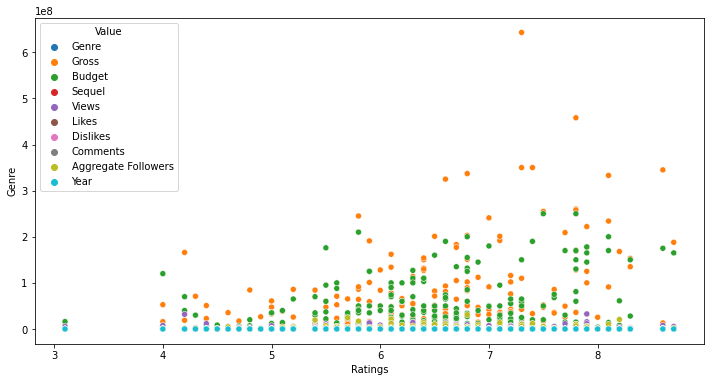

In [44]:
plt.figure(figsize=(12, 6))
ax = seaborn.scatterplot(data=pivoted, x='Ratings', y='Genre', hue='Value')

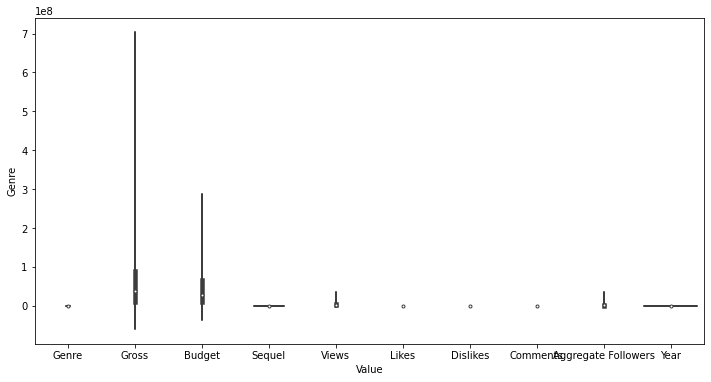

In [45]:
plt.figure(figsize=(12, 6))
ax = seaborn.violinplot(data=pivoted, y='Genre', x='Value')

In [49]:
movies.iplot(kind='scatter', x='Ratings', mode='markers')

In [50]:
movies.iplot(kind='box')

## Modeling the data

Modules such as `scikit-learn` offer a huge range of options to model data.

Here we build a simple linear regression model to predict ratings.

In [55]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using Genre and Gross as predictors
# Split data into predictors X and output Y
predictors = ['Genre', 'Gross']
X = movies[predictors]
y = movies['Ratings']

# Initialise and fit model
lm = LinearRegression()
model_Genre_Gross = lm.fit(X, y)

In [56]:
# We can examine the model coefficients
print(f'alpha = {model_Genre_Gross.intercept_}')
print(f'betas = {model_Genre_Gross.coef_}')

alpha = 6.255804446811686
betas = [-1.22495790e-02  3.69351998e-09]


In [58]:
# And predict Ratings for a combination of Genre and Gross 
new_X = [[300, 200]]
print(model_Genre_Gross.predict(new_X))

[2.5809315]


## Model validation

`sklearn` has many functions to simplfy the validation of models, such as generating training/test splits.

In [60]:
from sklearn.model_selection import train_test_split

# Divide the data 80-20 into a training and test set
train, test = train_test_split(movies, test_size=0.2)

In [61]:
# Build linear regression model on the training data using all predictors
predictors = ['Views', 'Likes', 'Budget']
X = train[predictors]
y = train['Ratings']

# Initialise and fit model
lm = LinearRegression()
model_All = lm.fit(X, y)

In [62]:
# Use the model to predict sales for our test data
test['predictions'] = model_All.predict(test[predictors])

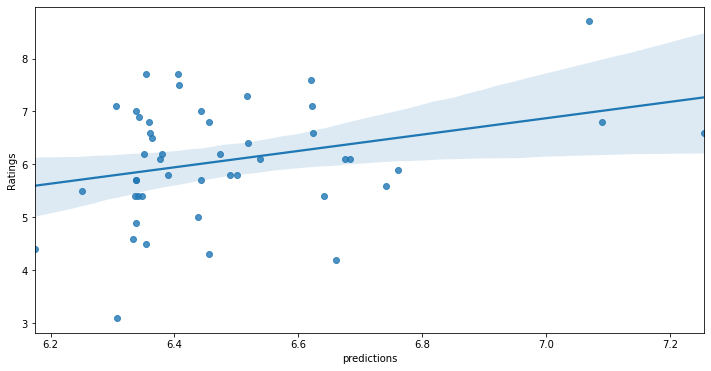

In [64]:
plt.figure(figsize=(12, 6))
ax = seaborn.regplot(y='Ratings', x='predictions', data=test)

In [68]:
# Build linear regression model on the training data using all predictors
predictors = ['Comments', 'Dislikes', 'Gross']
X = train[predictors]
y = train['Ratings']

# Initialise and fit model
lm = LinearRegression()
model_All = lm.fit(X, y)

In [69]:
# Use the model to predict sales for our test data
test['predictions'] = model_All.predict(test[predictors])

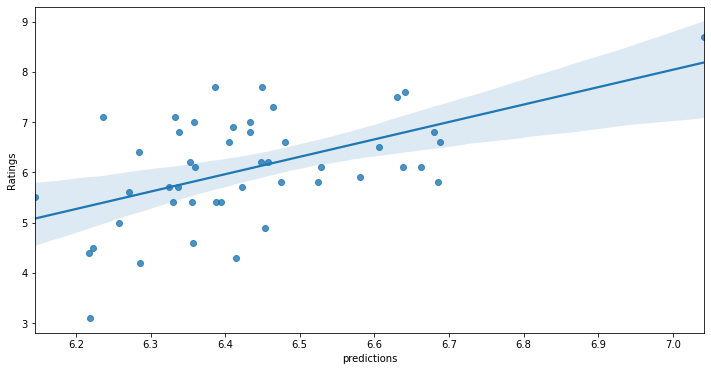

In [70]:
plt.figure(figsize=(12, 6))
ax = seaborn.regplot(y='Ratings', x='predictions', data=test)

`sklearn` has built in functions to generate quality metrics such as R²

In [71]:
r_squared = model_All.score(test[predictors], test["Ratings"])
print(f'Model R²: {r_squared:.2f}')

Model R²: 0.03
